In [95]:
# imports and settings
%run plot_settings.py
%matplotlib inline

# load experimental data
path_data = '/Users/baumgaer/ownCloud/GitHub/gene_transcription_SMC_ABC/experimental_data/'

data_0pME2 = np.loadtxt(path_data+'data_0pME2.csv')
data_5pME2 = np.loadtxt(path_data+'data_5pME2.csv')
data_7pME2 = np.loadtxt(path_data+'data_7pME2.csv')
data_10pME2 = np.loadtxt(path_data+'data_10pME2.csv')
data_14pME2 = np.loadtxt(path_data+'data_14pME2.csv')
data_20pME2 = np.loadtxt(path_data+'data_20pME2.csv')
data_100pME2 = np.loadtxt(path_data+'data_100pME2.csv')
data_1000pME2 = np.loadtxt(path_data+'data_1000pME2.csv')

mock_0pME2 = np.loadtxt(path_data+'mock_0pME2.csv')
mock_5pME2 = np.loadtxt(path_data+'mock_5pME2.csv')
mock_7pME2 = np.loadtxt(path_data+'mock_7pME2.csv')
mock_10pME2 = np.loadtxt(path_data+'mock_10pME2.csv')
mock_14pME2 = np.loadtxt(path_data+'mock_14pME2.csv')
mock_20pME2 = np.loadtxt(path_data+'mock_20pME2.csv')
mock_100pME2 = np.loadtxt(path_data+'mock_100pME2.csv')
mock_1000pME2 = np.loadtxt(path_data+'mock_1000pME2.csv')

# load fitting results
path_fits = '/Users/baumgaer/ownCloud/GitHub/gene_transcription_SMC_ABC/model_fits/dose_response/'
smc_0pM = np.load(path_fits+'smc_0pM.npy')
smc_0pM_110 = np.load(path_fits+'smc_0pM_110.npy')
smc_0pM_115 = np.load(path_fits+'smc_0pM_115.npy')
smc_5pM = np.load(path_fits+'smc_5pM.npy')
smc_5pM_110 = np.load(path_fits+'smc_5pM_110.npy')
smc_5pM_115 = np.load(path_fits+'smc_5pM_115.npy')
smc_7pM = np.load(path_fits+'smc_7pM.npy')
smc_7pM_110 = np.load(path_fits+'smc_7pM_110.npy')
smc_7pM_115 = np.load(path_fits+'smc_7pM_115.npy')
smc_10pM = np.load(path_fits+'smc_10pM.npy')
smc_10pM_110 = np.load(path_fits+'smc_10pM_110.npy')
smc_10pM_111 = np.load(path_fits+'smc_10pM_111.npy')
smc_10pM_112 = np.load(path_fits+'smc_10pM_112.npy')
smc_10pM_115 = np.load(path_fits+'smc_10pM_115.npy')
smc_14pM = np.load(path_fits+'smc_14pM.npy')
smc_14pM_110 = np.load(path_fits+'smc_14pM_110.npy')
smc_14pM_115 = np.load(path_fits+'smc_14pM_115.npy')
smc_20pM = np.load(path_fits+'smc_20pM.npy')
smc_20pM_110 = np.load(path_fits+'smc_20pM_110.npy')
smc_20pM_115 = np.load(path_fits+'smc_20pM_115.npy')
smc_100pM = np.load(path_fits+'smc_100pM.npy')
smc_100pM_110 = np.load(path_fits+'smc_100pM_110.npy')
smc_100pM_115 = np.load(path_fits+'smc_100pM_115.npy')
smc_1000pM = np.load(path_fits+'smc_1000pM.npy')
smc_1000pM_110 = np.load(path_fits+'smc_1000pM_110.npy')
smc_1000pM_115 = np.load(path_fits+'smc_1000pM_115.npy')

# Model selection

## Model selection Fig 3

In [65]:
def model_selection_matrix(smc_res):
    selection = np.zeros((len(smc_res), smc_res[0].shape[0]))
    for ii, smc in enumerate(smc_res):
        selection[ii] = smc[:, 1]

    res = np.zeros((5, 8))
    res_ind = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7),
               (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
               (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7),
               (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7),
               (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]

    for ii, ind in enumerate(res_ind):
        model_count = np.where(selection == ii)[0].shape[0]
        res[ind] = model_count

    return selection, res

def fig3_model_selection(smc_res, save = [False]):
    fig,ax = pl.subplots(1,1, figsize = (6,6))
    
    cmap = matplotlib.cm.gray
    interpolation = 'none'
    aspect = 'auto'
    
    selection, model_mat = model_selection_matrix(smc_res)
    model_mat = model_mat / model_mat.sum()
    n = 10
    mat = np.kron(model_mat,np.ones((n,n)))
    cax1 = ax.imshow(mat.transpose(), interpolation = interpolation, aspect = aspect, cmap = cmap)
    cax1.set_clim(-0.05, 0.42)
    ylabel = ['', 'no perturbation', 'Pol II speed', 'Initiation rate', 'On time', 'Off time',
              'Pol II speed + initiation rate', 'Pol II speed + on time', 'Pol II speed + off time']
    ax.set_yticklabels(ylabel)

    xlabel = ['', 'One on, one off', 'One on, two off', 'Two on, two off', 'One on, nine off', 'Two on, eight off']
    ax.set_xticklabels(xlabel, rotation = 90)

    cbar = fig.add_axes([0.92, 0.125, 0.04, 0.754])
    fig.colorbar(cax1, cax = cbar, orientation = "vertical", ticks = [0,0.2,0.4])
    cbar.set_ylabel('Percentage')
    
    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi = save[3], format = 'svg')

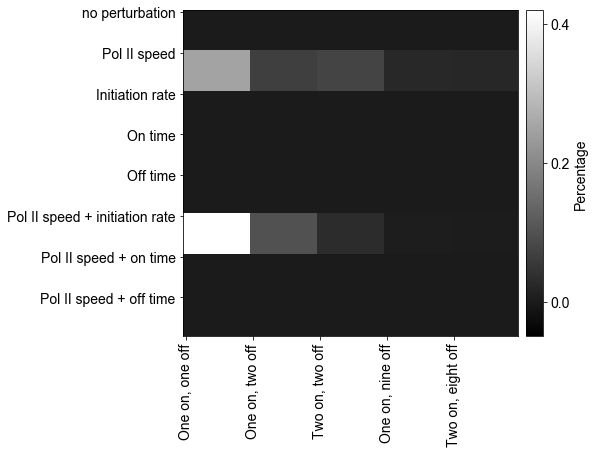

In [66]:
smc_res = [smc_0pM[0],smc_5pM[0],smc_7pM[0],smc_10pM[0],smc_14pM[0],smc_20pM[0],smc_100pM[0],smc_1000pM[0]]
fig3_model_selection(smc_res)

## Model selection Fig EV3

In [88]:
def fig_EV3_full_model_selection(smc_res,
                                 labels = ['110','111','112','113','114','115','116','117',
                                           '120','121','122','123','124','125','126','127',
                                           '220','221','222','223','224','225','226','227',
                                           '190','191','192','193','194','195','196','197',
                                           '280','281','282','283','284','285','286','287'],
                                 conc = ['','0 pM','5 pM','7 pM','10 pM','14 pM','20 pM','100 pM','1000 pM'],
                                 save = [False]):
    count = []
    for smc in smc_res:
        m = smc[:,1]
        c = np.bincount(np.array(m,dtype=int),minlength=40)
        count.append(c)
        
    res = np.vstack(count)
    
    res = sp.log10(res)
    interpolation = 'none'
    aspect = 'auto'
    cmap = matplotlib.cm.viridis
    
    fig,ax = pl.subplots(1,1, figsize = (10,4))
    cax = ax.imshow(res,interpolation = interpolation,aspect = aspect, cmap = cmap)
    cbar = fig.add_axes([0.92,0.1,0.02,0.8])
    fig.colorbar(cax, cax = cbar,orientation="vertical",ticks = [0,1,2,3])
    cbar.set_yticklabels([1,10,100,1000])

    ax.set_xticks(np.arange(0,40))
    ax.set_xticklabels(labels, rotation = 90);
    ax.set_xlabel('Models')
    ax.set_yticklabels(conc);
    ax.set_ylabel('Concentration')
    
    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi = save[3], format = 'svg')
        

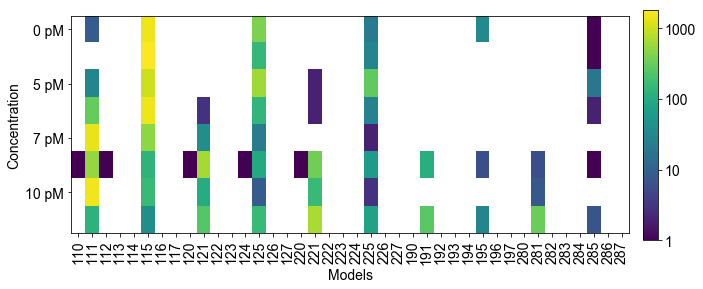

In [93]:
fig_EV3_full_model_selection(smc_res)

# Goodness of fit

## Distance metric

In [160]:
def fig_EV3_distance(smc_dist,
                    conc = ['0','5','7','10','14','20','100','1000'],
                    save=[False]):
    dist = []
    
    for smc in smc_dist:
        dist.append(smc[:,-1])
        
    fig,ax = pl.subplots(1,1, figsize = (5,5))
    
    bp = ax.boxplot(dist, patch_artist=True, whis = [5,95], showfliers=False)
    nice_boxplots(bp)
    ax.set_ylabel('Distance between model and data')
    ax.set_xticklabels(conc, rotation = 90)
    ax.set_xlabel('E2 concentration (pM)')
    
    ax.plot([0,9],[0.5,0.5],'--',lw = 2, color = 'lightgrey')
    
    pl.tight_layout()
    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi=save[3])

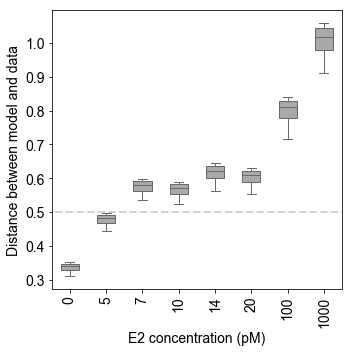

In [161]:
smc_dist = [smc_0pM[2],smc_5pM[2],smc_7pM[2],smc_10pM[2],smc_14pM[2],smc_20pM[2],smc_100pM[2],smc_1000pM[2]]
fig_EV3_distance(smc_dist)

In [213]:
def fig_EV3_distance_variability(smc_dist_110,smc_dist_115,smc_dist_111,smc_dist_112,
                          conc = ['0','5','7','10','14','20','100','1000'],
                          save=[False]):
    
    dist_110 = []
    dist_115 = []
    for ii,smc_110 in enumerate(smc_dist_110):
        dist_110.append(smc_110[:,-1])
        dist_115.append(smc_dist_115[ii][:,-1])

    positions_110 = np.array([0,2,4,6,10,12,14,16])    
    positions_115 = np.array([1,3,5,9,11,13,15,17])
    ticks = [0.5,2.5,4.5,7.5,10.5,12.5,14.5,16.5]
    vert_lines = [1.5,3.5,5.5,9.5,11.5,13.5,15.5]
    widths = 0.4
    
    fig,ax = pl.subplots(1,1, figsize = (10,5))
    
    bp = ax.boxplot(dist_110,positions=positions_110,patch_artist=True,whis=[5,95],showfliers=False,widths=widths)
    nice_boxplots(bp)
    
    bp = ax.boxplot(dist_115,positions=positions_115,patch_artist=True,whis=[5,95],showfliers=False, widths=widths)
    for box in bp['boxes']:
        box.set(facecolor = 'lime')
    for median in bp['medians']:
        median.set(color='dimgrey', linewidth=1)
        
    bp = ax.boxplot([smc_dist_111],positions=[7], patch_artist=True, showfliers=False, whis = [5,95], widths = widths)
    for box in bp['boxes']:
        box.set(facecolor = 'steelblue')
    for median in bp['medians']:
        median.set(color='dimgrey', linewidth=1)
        
    bp = ax.boxplot([smc_dist_112],positions=[8], patch_artist=True, showfliers=False, whis = [5,95], widths = widths)
    for box in bp['boxes']:
        box.set(facecolor = 'green')
    for median in bp['medians']:
        median.set(color='dimgrey', linewidth=1)
        
    for ll in vert_lines:
        ax.plot([ll,ll],[0,1.4],'--',lw = 2, color = 'lightgrey')

    ax.set_ylabel('Distance between model and data')
    ax.set_xticks(ticks)
    ax.set_xticklabels(conc, rotation = 90)
    ax.set_xlabel('E2 concentration (pM)')
    ax.set_xlim(-1,18)
    ax.set_ylim(0,1.35)
    
    ax.plot([10,10],[10,10],'s', ms = 10, color= 'dimgrey', label = '110')
    ax.plot([10,10],[10,10],'s', ms = 10, color= 'lime', label = '115')
    ax.plot([10,10],[10,10],'s', ms = 10, color= 'steelblue', label = '111')
    ax.plot([10,10],[10,10],'s', ms = 10, color= 'green', label = '112')
    ax.legend(loc = 'best', fontsize = 14)
    
    pl.tight_layout()
    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi=save[3])

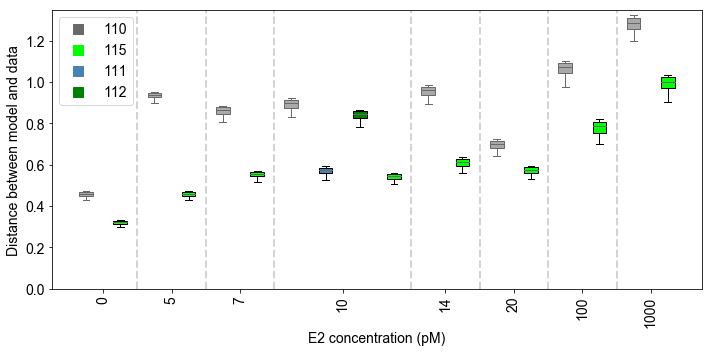

In [214]:
smc_dist_110 = [smc_0pM_110[2],smc_5pM_110[2],smc_7pM_110[2],smc_10pM_110[2],smc_14pM_110[2],smc_20pM_110[2],smc_100pM_110[2],smc_1000pM_110[2]]
smc_dist_115 = [smc_0pM_115[2],smc_5pM_115[2],smc_7pM_115[2],smc_10pM_115[2],smc_14pM_115[2],smc_20pM_115[2],smc_100pM_115[2],smc_1000pM_115[2]]

fig_EV3_distance_variability(smc_dist_110,smc_dist_115,smc_10pM_111[2][:,-1],smc_10pM_112[2][:,-1])

## Best particles

In [4]:
def figure_3_best_particles(data, mock, smc_simulations, windows=win, save=[False],
                  n_part=10):
    lw = 3
    factor = [33.15, 33.15, 33.15, 33.15, 33.15, 33.15, 23.3, 23.3]
    ind_hist = [[6, 38], [6, 38], [6, 38], [6, 38], [6, 38], [6, 38], [4, 37], [4, 37]]
    color = 'crimson'
    color_fits = 'dimgrey'
    # color_bg = 'lightgrey'
    alpha = 0.7
    alpha_fits = 0.05
    ind = [0, 1, 3, 6]
    bins_hl = sp.linspace(0, 15, 20)
    bin_centers_hl = (bins_hl[1:] - bins_hl[:-1]) / 2 + bins_hl[:-1]
    bins_lag = sp.linspace(0, 1, 20)
    bin_centers_lag = (bins_lag[1:] - bins_lag[:-1]) / 2 + bins_lag[:-1]

    matplotlib.rcParams.update({'font.size': 15, 'font.family': 'sans'})
    fig, ax = pl.subplots(len(data), 4, figsize=(1.4 * fig_width, 4 * figheight_single))

    for ii in np.arange(0, len(data)):

        for jj in np.arange(0, n_part):
            bins, hist = spl.calc_histogram(smc_simulations[ii][:, :, jj])
            ax[ii, 0].plot(bins[ind_hist[ii][0]:ind_hist[ii][1]] / factor[ii], hist[ind_hist[ii][0]:ind_hist[ii][1]],
                           lw=1, alpha=alpha_fits, color=color_fits)

            ts, acf = smc.acf_sliding_window(smc_simulations[ii][:, :, jj], windows)
            acf_m = smc.average_acf(acf)
            ax[ii, 1].plot(np.arange(0, len(acf_m.mean(axis=0)))[0:34] * 3,
                           acf_m.mean(axis=0)[0:34], lw=2, color=color_fits, alpha=alpha_fits)

            acf_hl_hist = bootstrap_acf_hl(acf, bins_hl)
            hl_m = acf_hl_hist.mean(axis=0)
            ax[ii, 2].plot(bin_centers_hl, hl_m, lw=2, color=color_fits, alpha=alpha_fits)

            acf_lag_hist = bootstrap_acf_lag(acf, bins_lag)
            lag_m = acf_lag_hist.mean(axis=0)
            ax[ii, 3].plot(bin_centers_lag, lag_m, lw=2, color=color_fits, alpha=alpha_fits)

        bins, hist = spl.calc_histogram(data[ii])
        ax[ii, 0].plot(bins[ind_hist[ii][0]:ind_hist[ii][1]] / factor[ii], hist[ind_hist[ii][0]:ind_hist[ii][1]],
                       color=color, lw=2)

        ts, acf = smc.acf_sliding_window(data[ii], windows)
        acf_m = smc.average_acf(acf)
        ax[ii, 1].plot(np.arange(0, len(acf_m.mean(axis=0)))[0:34] * 3,
                       acf_m.mean(axis=0)[0:34], lw=2, color=color)

        acf_hl_hist = bootstrap_acf_hl(acf, bins_hl)
        hl_m = acf_hl_hist.mean(axis=0)
        ax[ii, 2].plot(bin_centers_hl, hl_m, lw=2, color=color)

        acf_lag_hist = bootstrap_acf_lag(acf, bins_lag)
        lag_m = acf_lag_hist.mean(axis=0)
        ax[ii, 3].plot(bin_centers_lag, lag_m, lw=2, color=color)

        ax[ii, 0].set_xlabel('#RNA')
        ax[ii, 0].set_ylabel('Frequency')
        ax[ii, 0].set_xscale('log')
        ticks = [0.0, 0.05, 0.1, 0.15, 0.2]
        ax[ii, 0].set_yticks(ticks)
        ax[ii, 0].set_xlim(1e-1, 2e2)

        ax[ii, 1].set_xlim(0, 100)
        ax[ii, 1].set_ylabel('ACF')
        ax[ii, 1].set_xlabel('Lag (min)')
        ax[ii, 1].set_ylim(-.2, 1)

        ax[ii, 2].set_ylabel('Frequency')
        ax[ii, 2].set_ylim(0, 0.5)
        ax[ii, 2].set_xlim(0, 15)
        ticks = [0, 2, 4, 6, 8, 10, 12, 14]
        ax[ii, 2].set_xticks(ticks)
        ax[ii, 2].set_xticklabels(ticks * 3)
        ax[ii, 2].set_xlabel('ACF HL (min)')

        ax[ii, 3].set_ylabel('Frequency')
        ax[ii, 3].set_xlabel('ACF @ lag = 1')
        ax[ii, 3].set_xlim(0, 1)
        ax[ii, 3].set_ylim(0, 15)

    pl.tight_layout()
    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi=save[3])

In [5]:
smc_simulations_all = [smc_0pM[1],smc_5pM[1],smc_7pM[1],smc_10pM[1],smc_14pM[1],
                      smc_20pM[1],smc_100pM[1],smc_1000pM[1]]

figure_3_best_particles(data_all,mock_all,smc_simulations_all,n_part = 5)

NameError: name 'data_all' is not defined

# Local parameter posterior distributions

In [146]:
def fig_EV3_local_posteriors(smc_res,
                             conc = ['0','5','7','10','14','20','100','1000'],
                             save=[False]):
    bursts = []
    t_on = []
    t_off = []
    
    for smc in smc_res:
        bursts.append(smc[:,8])
        t_on.append(smc[:,9])
        t_off.append(smc[:,10])
        
    fig,ax = pl.subplots(1,3,figsize = (12,4))   
    
    bp = ax[1].boxplot(bursts,patch_artist = True, whis = [5,95],vert = True,showfliers = False);
    nice_boxplots(bp)
    ax[1].set_yscale('log')
    ax[1].set_xticklabels(conc, rotation = 90);
    ax[1].set_ylabel('Burst size (#RNA)')
    ax[1].set_xlabel('E2 concentration (pM)')
    ax[1].set_ylim(0.1,30)

    bp = ax[0].boxplot(t_on,patch_artist = True, whis = [5,95],vert = True,showfliers = False);
    nice_boxplots(bp)
    ax[0].set_yscale('log')
    ax[0].set_ylabel('On time (min)')
    ax[0].set_ylim(0.1,3)
    ax[0].set_xticklabels(conc, rotation = 90);
    ax[0].set_xlabel('E2 concentration (pM)')

    bp = ax[2].boxplot(T_off,patch_artist = True, whis = [5,95],vert = True,showfliers = False);
    nice_boxplots(bp)
    ax[2].set_yscale('log')
    ax[2].set_ylabel('OFF time (min)')
    ax[2].set_ylim(4,500)
    ax[2].set_xticklabels(conc, rotation = 90);
    ax[2].set_xlabel('E2 concentration (pM)')
    
    pl.tight_layout()
    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi=save[3])

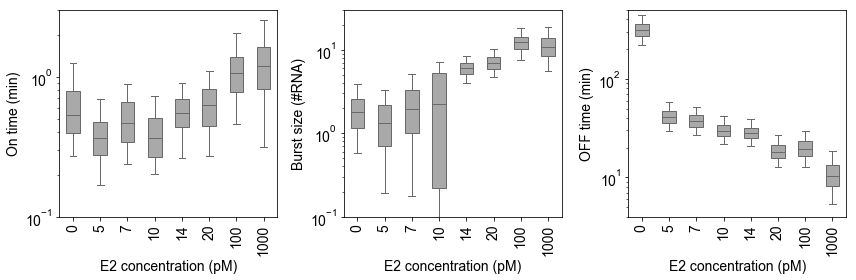

In [147]:
fig_EV3_local_posteriors(smc_res)

# Benchmarking

## Parameter estimation

## Model recovery